<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>JARINGAN SYARAF TIRUAN
<br><br>
<br><strong> NAMA :
    <br><br>
<br><strong>ABDULLAH FARHAN
<br><br>
    <br><strong> NIM :
    <br><br>
<br><strong>09011181722081
<br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br>

#### IMPORT
NumPy adalah salah satu library teratas yang dilengkapi dengan sumber daya yang berguna untuk membantu para data scientist mengubah Python menjadi alat analisis dan pemodelan ilmiah yang kuat.


Keras Applications adalah salah satu modul dalam pustaka Keras yang menyediakan arsitektur berbagai model Deep Learning ternama. Model-model itu sudah dilatih out of the box. Dengan kata lain, menggunakan Keras Applications sama halnya membuat sistem cerdas.

scikit-learn adalah library untuk machine learning bagi para pengguna python. Scikit-learn merupakan free software, dan memungkinkan kita melakukan beragam pekerjaan dalam Data Science, seperti regresi (regression), klasifikasi (classification), pengelompokkan/penggugusan (clustering), data preprocessing, dimensionality reduction, dan model selection (pembandingan, validasi, dan pemilihan parameter maupun model).

Seaborn adalah library visualisasi data Python berdasarkan matplotlib . Ini menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.

Matplotlib adalah library ilmiah Python populer yang digunakan untuk menghasilkan visualisasi yang sederhana dan kuat. Anda dapat menggunakan kerangka kerja Python untuk ilmu data untuk menghasilkan grafik, chart, histogram, dan bentuk dan gambar lain yang kreatif — tanpa perlu khawatir menulis banyak baris kode.

In [22]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt


## Dataset
##### Dataset Di dapatkan dari 
https://datahub.io/machine-learning/pendigits


###### Label nya adalah angka 0 hingga 10

In [23]:
data = np.loadtxt('datasets/pendigits_csv.csv', delimiter=',',skiprows=1)
dataset= pd.read_csv('datasets/pendigits_csv.csv', delimiter=',',skiprows=1)
data.shape

(10992, 17)

data berisi 10992 baris dan 17 kolom


In [3]:
data

array([[ 47., 100.,  27., ...,  40.,  98.,   8.],
       [  0.,  89.,  27., ..., 100.,   6.,   2.],
       [  0.,  57.,  31., ...,  16.,   0.,   1.],
       ...,
       [ 56., 100.,  27., ...,  38.,  93.,   0.],
       [ 19., 100.,   0., ...,  10.,  81.,   0.],
       [ 38., 100.,  37., ...,  65.,   0.,   4.]])

###### Dari keterangan dibawah, tidak ditemukan data yang missing value

In [4]:
np.isnan(data).sum()

0

### Pemisahan data

##### Data memiliki 16 fitur dan 1 label

In [5]:
X = data[:,0:16]
Y = data[:,16]

In [6]:
Y.shape

(10992,)

 # Histogram
 Histogram merupakan tampilan bentuk grafis untuk menunjukkan distribusi data secara visual atau seberapa sering suatu nilai yang berbeda itu terjadi dalam suatu kumpulan data.

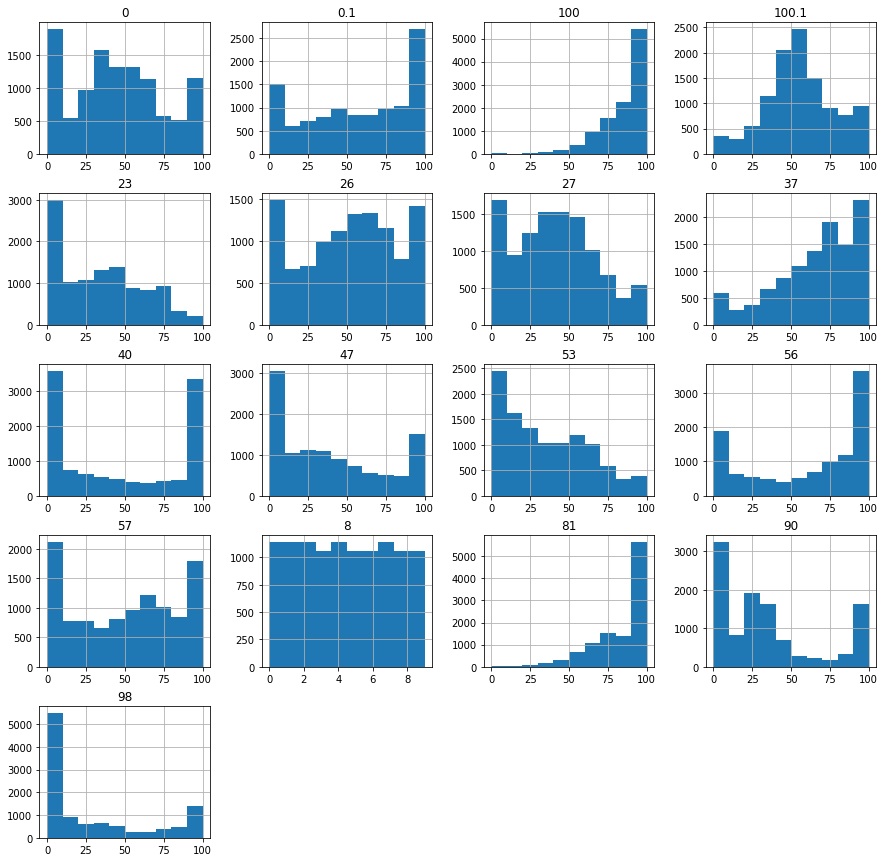

In [24]:
dataset.hist(figsize=(15,15))
plt.show()

## BOX PLOT
Penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. 

47          AxesSubplot(0.125,0.821923;0.352273x0.0580769)
100      AxesSubplot(0.547727,0.821923;0.352273x0.0580769)
27          AxesSubplot(0.125,0.752231;0.352273x0.0580769)
81       AxesSubplot(0.547727,0.752231;0.352273x0.0580769)
57          AxesSubplot(0.125,0.682538;0.352273x0.0580769)
37       AxesSubplot(0.547727,0.682538;0.352273x0.0580769)
26          AxesSubplot(0.125,0.612846;0.352273x0.0580769)
0        AxesSubplot(0.547727,0.612846;0.352273x0.0580769)
0.1         AxesSubplot(0.125,0.543154;0.352273x0.0580769)
23       AxesSubplot(0.547727,0.543154;0.352273x0.0580769)
56          AxesSubplot(0.125,0.473462;0.352273x0.0580769)
53       AxesSubplot(0.547727,0.473462;0.352273x0.0580769)
100.1       AxesSubplot(0.125,0.403769;0.352273x0.0580769)
90       AxesSubplot(0.547727,0.403769;0.352273x0.0580769)
40          AxesSubplot(0.125,0.334077;0.352273x0.0580769)
98       AxesSubplot(0.547727,0.334077;0.352273x0.0580769)
8           AxesSubplot(0.125,0.264385;0.352273x0.058076

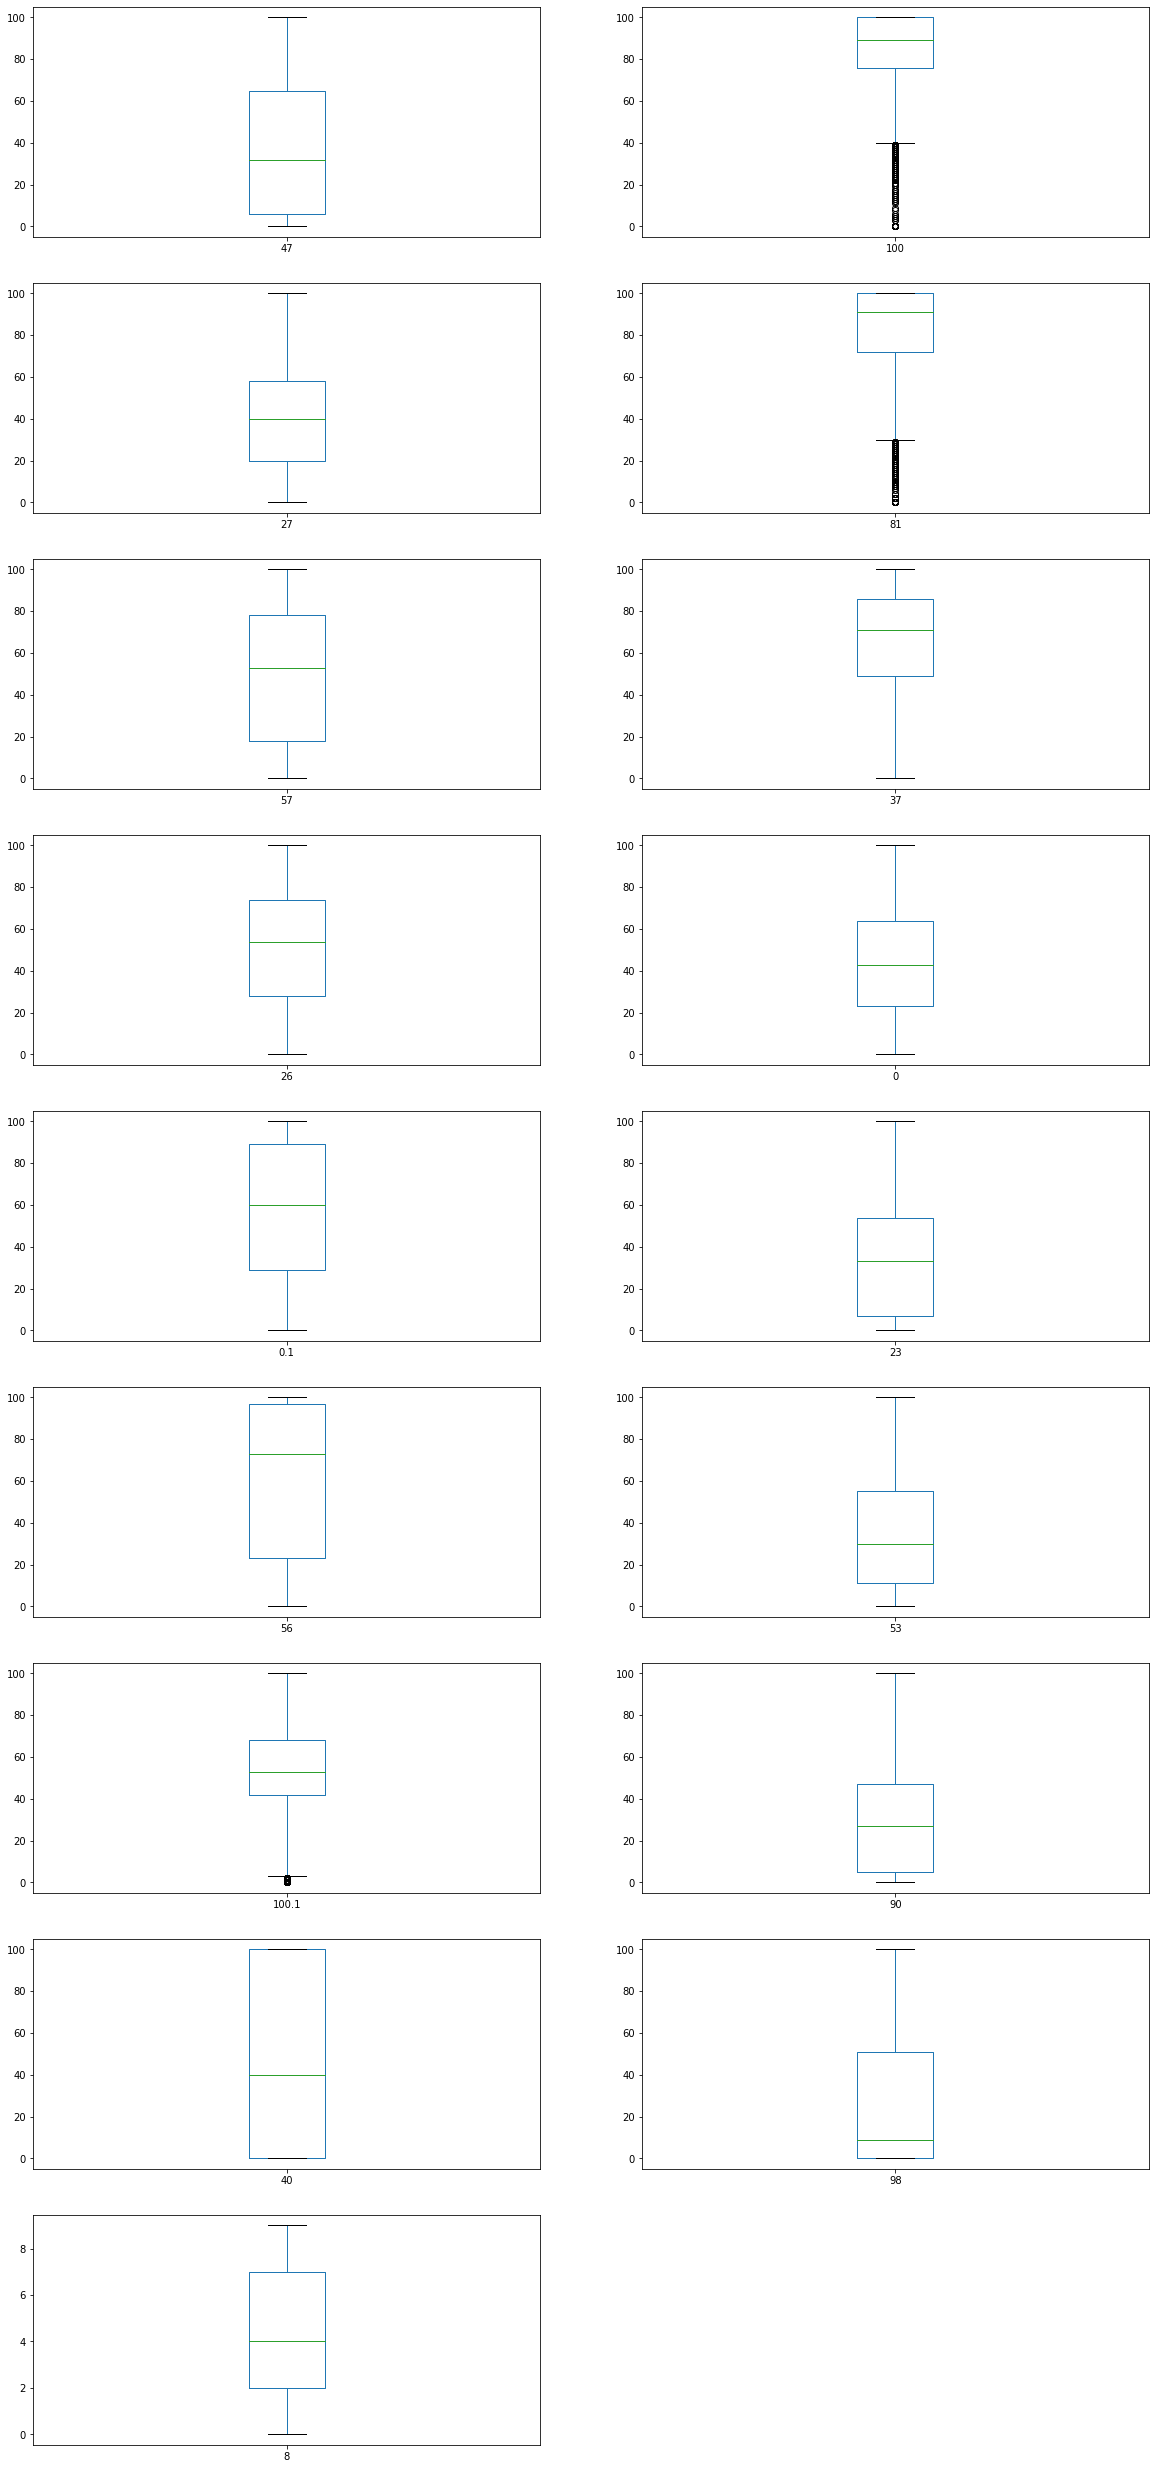

In [25]:
dataset.plot(kind='box', subplots=True, layout=(11,2), sharex=False, sharey=False, figsize=(20,55))

## NORMALISASI
Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan.

In [7]:
scaler = MinMaxScaler()
x_scale = scaler.fit(X)
x_scale = scaler.fit_transform(X)

In [8]:
Y_categorical = to_categorical(Y)
Y_categorical.shape

(10992, 10)

### Splitting Data

###### Data di split antara data Training dan data Testing dengan rasio 8 : 2
###### 80% untuk data training dan 20% untuk data testing

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x_scale, Y_categorical, test_size=0.2, random_state=2) 

# Model ANN

Disini digunakan model Sequential(). 
1. Input layer -> Layer pertama memliki 16 input sama dengan fitur pada data
2. Hidden Layer pertama -> 16 units Neural Network.
3. Hidden Layer Kedua -> 12 units Neural Network.
4. Output layer -> 10 unit Neural Network dengan menggunakan activation softmax.

In [10]:
model = Sequential()
model.add(Dense(units= 16, input_dim =16 , activation=relu))
model.add(Dense(units= 12, activation=relu))
model.add(Dense(units= 10, activation='softmax'))

# Compile Model

Model Dicompile dengan Optimizer adam dengan fungsi loss Categorical Crossentropy

In [11]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Melakukan Training dengan data Train

Menggunakan Batch Size 100 dan epoch 40

In [12]:
acc_training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, 
                         epochs=40)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 8793 samples, validate on 2199 samples
Epoch 1/40
8793/8793 [==============================] - 3s 387us/step - loss: 2.1960 - acc: 0.2089 - val_loss: 2.0585 - val_acc: 0.3170
Epoch 2/40
8793/8793 [==============================] - 1s 74us/step - loss: 1.8821 - acc: 0.3879 - val_loss: 1.7319 - val_acc: 0.4466
Epoch 3/40
8793/8793 [==============================] - 0s 44us/step - loss: 1.5313 - acc: 0.5424 - val_loss: 1.3636 - val_acc: 0.6103
Epoch 4/40
8793/8793 [==============================] - 0s 49us/step - loss: 1.1665 - acc: 0.6797 - val_loss: 1.0488 - val_acc: 0.7258
Epoch 5/40
8793/8793 [==============================] - 0s 49us/step - loss: 0.9143 - acc: 0.7660 - val_loss: 0.8479 - val_acc: 0.8045
Epoch 6/40
8793/8793 [==============================] - 0s 49us/step - loss: 0.7505 - acc: 0.8084 - val_loss: 0.7110 - val_acc: 0.8190
Epoch 7/40
8793/8793 [========================

# Akurasi Dari model Evaluate

In [13]:
acc_testing  = model.evaluate(X_test, Y_test) 
acc_testing
print("\n%s: %.2f%%" % (model.evaluate, acc_testing[1]*100))

2199/2199 [==============================] - 0s 55us/step

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x000002447752B780>>: 95.73%


akurasi yang didapat adalah 95,73%

# Plotting Model Akurasi

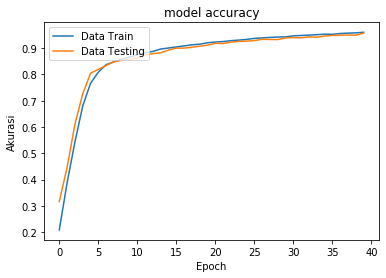

In [14]:
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Train', 'Data Testing'], loc='upper left')
plt.show()

# Plotting Model Loss

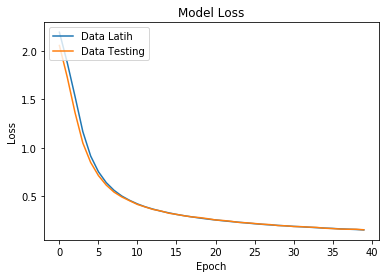

In [15]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
prediction = model.predict_classes(X_test)

In [17]:
prediction
y_test_number = np.argmax(Y_test,axis=1)

In [18]:
print (y_test_number[:10])
print (prediction[:10])

[2 6 2 1 8 5 7 8 5 3]
[2 6 2 1 8 5 7 8 5 3]


DIATAS MERUPAKAN HASIL PERBANDINGAN ANTARA Y TEST DAN PREDIKSI

# CONFUSION MATRIX

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

In [19]:
cm = confusion_matrix(y_test_number, prediction) 
print(cm)

[[210   0   0   0   1   0   1   0   4   1]
 [  0 203  11   9   0   4   0   1   0   6]
 [  0  12 223   0   0   0   0   0   0   0]
 [  0   0   0 215   0   2   0   0   0   0]
 [  0   0   0   0 209   1   1   1   0   0]
 [  0   4   0   2   0 213   1   0   0   6]
 [  0   0   0   0   1   0 213   0   0   0]
 [  0   3   0   0   1   1   1 203   3   3]
 [  2   0   0   0   0   1   0   1 183   4]
 [  0   1   0   2   1   0   0   1   0 233]]


In [20]:
print(classification_report(y_test_number,prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       217
           1       0.91      0.87      0.89       234
           2       0.95      0.95      0.95       235
           3       0.94      0.99      0.97       217
           4       0.98      0.99      0.98       212
           5       0.96      0.94      0.95       226
           6       0.98      1.00      0.99       214
           7       0.98      0.94      0.96       215
           8       0.96      0.96      0.96       191
           9       0.92      0.98      0.95       238

    accuracy                           0.96      2199
   macro avg       0.96      0.96      0.96      2199
weighted avg       0.96      0.96      0.96      2199

